# Задание 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [3]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [4]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

In [5]:
n = 10
bb = (n * (np.sum(X*y)) - (np.sum(X) * np.sum(y))) / (n * (np.sum(X**2)) - ((np.sum(X)**2)))
bb

2.6205388824027653

In [6]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [7]:
y_hat = 444.177 + 2.62 * X
y_hat

array([535.877, 562.077, 941.977, 968.177, 548.977, 627.577, 585.657,
       837.177, 758.577, 732.377])

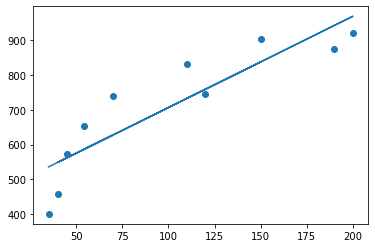

In [8]:
plt.scatter(X, y)
plt.plot(X, 444.177 + 2.62 * X)
plt.show()

In [9]:
mse = ((y - y_hat)**2).sum() / n
mse

6470.418241000005

## С интерсептом, с помощью матриц:

In [10]:
X = X.reshape((10, 1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [11]:
y = y.reshape((10, 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [12]:
X = np.hstack([np.ones((10, 1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [13]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

## Без интерсепта

In [14]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [15]:
X = X.reshape((10, 1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [16]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[5.88982042]])

# Задание 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [17]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [18]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [19]:
def mse_(B1, X=X, y=y, n=10):
    return np.sum((B1 * X - y)**2) / n

In [20]:
alpha = 1e-5
B1 = 0.1
n = 10

In [21]:
for i in range (10):
    B1 -= alpha * (2/n) * np.sum((B1*X - y) * X)
    print('B1={}'.format(B1))

B1=1.6952808000000004
B1=2.8510106906144004
B1=3.6883000130080337
B1=4.294889333823904
B1=4.734343885896736
B1=5.0527146463278365
B1=5.283364074395835
B1=5.450462204249402
B1=5.571519452188156
B1=5.659221554487849


In [22]:
for i in range (55):
    B1 -= alpha * (2/n) * np.sum((B1*X - y) * X)
    if i%5 == 0:
        print('Iteration: {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1 = 5.722758921136703, mse = 56901.35704574499
Iteration: 5, B1 = 5.856479896963282, mse = 56532.17235319795
Iteration: 10, B1 = 5.883166639986514, mse = 56517.468344241344
Iteration: 15, B1 = 5.888492522846594, mse = 56516.88270815252
Iteration: 20, B1 = 5.889555411195862, mse = 56516.859383246396
Iteration: 25, B1 = 5.8897675322042815, mse = 56516.8584542544
Iteration: 30, B1 = 5.88980986526988, mse = 56516.858417254174
Iteration: 35, B1 = 5.889818313694939, mse = 56516.858415780545
Iteration: 40, B1 = 5.889819999750153, mse = 56516.85841572186
Iteration: 45, B1 = 5.889820336236795, mse = 56516.85841571949
Iteration: 50, B1 = 5.889820403389555, mse = 56516.85841571941


# Задание 3*

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [23]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [24]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [25]:
alpha = 7e-5
B0 = 0.1
B1 = 0.1
n = 10

In [26]:
def mse_(B0, B1, X=X, y=y, n=10):
    return np.sum((B0 + B1 * X - y)**2) / n

In [27]:
for i in range (500001):
    y_pred = B0 + B1*X
    B0 -= alpha * (2/n) * np.sum((y_pred - y))
    B1 -= alpha * (2/n) * np.sum((y_pred - y) * X)
    if i%100000 == 0:
        print('Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse}'.format(i=i, B0=B0, B1=B1, mse=mse_(B0, B1)))

Iteration: 0, B0 = 0.19795239999999997, B1 = 11.265545999999999, mse = 454810.1461557979
Iteration: 100000, B0 = 431.4381057969951, B1 = 2.714305405990807, mse = 6511.581106452185
Iteration: 200000, B0 = 443.8118582432311, B1 = 2.6232291172362983, mse = 6470.448088165061
Iteration: 300000, B0 = 444.16687087011434, B1 = 2.6206160673423384, mse = 6470.414229071105
Iteration: 400000, B0 = 444.17705645979487, B1 = 2.6205410968989815, mse = 6470.414201199622
Iteration: 500000, B0 = 444.1773486923213, B1 = 2.620538945938383, mse = 6470.4142011766835
